<ipython-input-1-afbcdedaa83f>:26: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
No handles with labels found to put in legend.


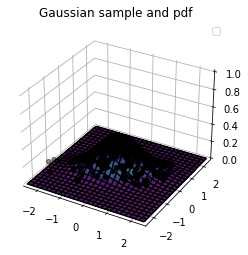

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal


# Sample parameters
mu = np.array([0, 0])
sigma = np.array([[0.7, 0.2], [0.2, 0.3]])
rv = multivariate_normal(mu, sigma)
sample = rv.rvs(500)

# Bounds parameters
x_abs = 2.5
y_abs = 2.5
x_grid, y_grid = np.mgrid[-x_abs:x_abs:.02, -y_abs:y_abs:.02]

pos = np.empty(x_grid.shape + (2,))
pos[:, :, 0] = x_grid
pos[:, :, 1] = y_grid

levels = np.linspace(0, 1, 40)

fig = plt.figure()
ax = fig.gca(projection='3d')

# Removes the grey panes in 3d plots
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# The heatmap
ax.contourf(x_grid, y_grid, 0.1 * rv.pdf(pos),
            zdir='z', levels=0.1 * levels, alpha=0.9)

# The wireframe
ax.plot_wireframe(x_grid, y_grid, rv.pdf(
    pos), rstride=10, cstride=10, color='k')

# The scatter. Note that the altitude is defined based on the pdf of the
# random variable
ax.scatter(sample[:, 0], sample[:, 1], 1.05 * rv.pdf(sample), c='k')

ax.legend()
ax.set_title("Gaussian sample and pdf")
ax.set_xlim3d(-x_abs, x_abs)
ax.set_ylim3d(-y_abs, y_abs)
ax.set_zlim3d(0, 1)

plt.show()

In [2]:
sample

array([[ 1.05158930e+00,  4.76128931e-01],
       [ 1.83256478e+00,  1.41413808e-01],
       [ 8.22242829e-01,  1.92569120e-01],
       [ 3.80663523e-01, -3.04434107e-01],
       [-1.22330612e-01,  9.84832243e-01],
       [ 1.40512014e+00,  1.91326700e-01],
       [-1.51364616e-01,  4.48812640e-01],
       [-6.79669130e-01,  1.81894483e-01],
       [ 1.13616809e+00,  9.64867192e-01],
       [ 1.03315123e+00,  4.84790020e-01],
       [-1.40120596e+00, -4.15187562e-01],
       [-2.15749904e-01, -8.14102519e-01],
       [ 4.22062139e-01,  7.63822014e-02],
       [ 7.36313970e-01,  2.84927050e-02],
       [-3.50078884e-01, -7.60341046e-01],
       [ 3.91821406e-01,  4.43266888e-01],
       [ 8.94081245e-01,  7.96693792e-02],
       [ 8.53136589e-01, -1.07717625e-02],
       [ 1.12082790e+00,  1.53588586e-01],
       [ 1.69558700e+00,  3.48140525e-01],
       [ 3.73831562e-01, -2.07318836e-02],
       [-1.53146627e-01,  5.68462670e-02],
       [ 3.48487069e-01,  3.83459910e-01],
       [ 7.